In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.table import Table

## Introduction

In this notebook we produce plots of the MIRI sensitivities and saturation limits for JDox ([sensitivity](https://jwst-docs.stsci.edu/display/JTI/MIRI+Sensitivity) and [bright limits](https://jwst-docs.stsci.edu/display/JTI/MIRI+Bright+Source+Limits)) and the instrument pocket guide. The data read in were produced with the Pandeia ETC engine. The data files are in the data_files directory, within a subdirectory that indicates the ETC/Pandeia version used to produce the figures. 

We first define the data directory, indicating the ETC version used to produce the numbers.



In [37]:
data_dir = 'data_files/ETC1.2/'
out_dir = 'plots/ETC1.2/'

## 1. Load in the datafiles

We start by loading in the data files and take a look at what's in them.

The files contain saturation limits as well as limiting fluxes. The saturation limit values assume 5 groups in FAST mode, and FULL array. NOTE: for LRS slitless the values should therefore be scaled by the ratio of exposure times in FULL vs. SLITLESSPRISM subarray ($\times \frac{2.775}{0.159}$). 

In [38]:
im_file = data_dir + 'miri_imaging_sensitivity_updated.npz'
im = np.load(im_file)
mrs_file = data_dir + 'miri_mrs_sensitivity_updated.npz'
mrs = np.load(mrs_file)
lrs_file = data_dir + 'miri_lrs_sensitivity_updated.npz'
lrs = np.load(lrs_file)


Examine the contents of these file:

In [39]:
imcols = im.keys()
lrscols = lrs.keys()
mrscols = mrs.keys()
print(imcols, lrscols, mrscols)
len(mrs['wavelengths'])

(['wavelengths', 'sns', 'lim_fluxes', 'sat_limits', 'configs'], ['wavelengths', 'sns', 'lim_fluxes', 'source_rates_per_njy', 'sat_limits', 'configs', 'line_limits'], ['wavelengths', 'sns', 'lim_fluxes', 'sat_limits', 'configs', 'line_limits'])


12

## 2. Sensitivity plot

In this section we'll produce a plot of the sensitivities of 4 MIRI modes: imager, LRS slit, LRS slitless and MRS, plotted together. This corresponds to Fig. 1 on [this JDox page](https://jwst-docs.stsci.edu/display/JTI/MIRI+Sensitivity). The values assume unresolved point sources, and indicate the minimum detectable flux in 10,000 seconds to reach SNR = 10. Spectroscopic values are given for continuum detection, in mJy. 

We create a few lists to identify the short, medium, long entries in the MRS file, so we can loop over it more easily, label the lines correctly and make the colours consistent. 


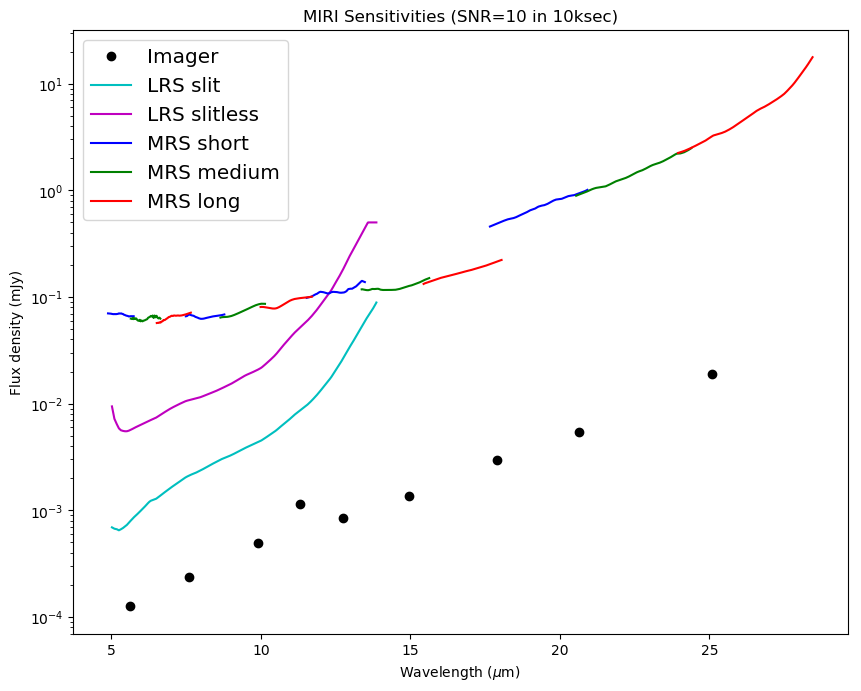

In [41]:
ishort = [0, 3, 6, 9]
imed = [i + 1 for i in ishort]
ilong = [i + 2 for i in ishort]
mrslabs = ['MRS short', '', '', '', 'MRS medium', '', '', '', 'MRS long', '', '', '']

sens_fig = plt.figure(figsize=[10,8])
pim = plt.semilogy(im['wavelengths'], im['lim_fluxes'], 'ko', label = 'Imager')
pslit = plt.semilogy(lrs['wavelengths'][1], lrs['lim_fluxes'][1], color = 'c', label = 'LRS slit')
psless = plt.semilogy(lrs['wavelengths'][0], lrs['lim_fluxes'][0], color = 'm', label = 'LRS slitless')

for s in ishort:
    pshort = plt.semilogy(mrs['wavelengths'][s], mrs['lim_fluxes'][s], color = 'b', label=mrslabs[s])
for m in imed:
    pmed = plt.semilogy(mrs['wavelengths'][m], mrs['lim_fluxes'][m], color = 'g', label=mrslabs[m])
for l in ilong:
    plong = plt.semilogy(mrs['wavelengths'][l], mrs['lim_fluxes'][l], color = 'r', label=mrslabs[l])

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Flux density (mJy)')
plt.title('MIRI Sensitivities (SNR=10 in 10ksec)')
plt.legend(loc='best', fontsize='x-large')
#plt.rcParams["figure.figsize"] = (15,12)
plt.savefig(out_dir + 'mirisensitivities.png', bbox_inches = 'tight')
plt.show()

### END OF UPDATES SO FAR ### (SK)

In [ ]:
plt.figure()
plt.semilogy(im['wavelengths'], im['sat_limits'],'bo', color = 'black', label = 'Imager')
plt.semilogy(lrs['wavelengths'][0], lrs['sat_limits'][0], color = 'c', label = 'LRS slit')
plt.semilogy(lrs['wavelengths'][1], lrs['sat_limits'][1], color = 'm', label = 'LRS slitless')
plt.semilogy(mrs['wavelengths'][0], mrs['sat_limits'][0], color = 'b', label = 'MRS Short')
plt.semilogy(mrs['wavelengths'][1], mrs['sat_limits'][1], color = 'g', label = 'MRS Medium')
plt.semilogy(mrs['wavelengths'][2], mrs['sat_limits'][2], color = 'r', label = 'MRS Long')
plt.semilogy(mrs['wavelengths'][3], mrs['sat_limits'][3], color = 'b')
plt.semilogy(mrs['wavelengths'][4], mrs['sat_limits'][4], color = 'g')
plt.semilogy(mrs['wavelengths'][5], mrs['sat_limits'][5], color = 'r')
plt.semilogy(mrs['wavelengths'][6], mrs['sat_limits'][6], color = 'b')
plt.semilogy(mrs['wavelengths'][7], mrs['sat_limits'][7], color = 'g')
plt.semilogy(mrs['wavelengths'][8], mrs['sat_limits'][8], color = 'r')
plt.semilogy(mrs['wavelengths'][9], mrs['sat_limits'][9], color = 'b')
plt.semilogy(mrs['wavelengths'][10], mrs['sat_limits'][10], color = 'g')
plt.semilogy(mrs['wavelengths'][11], mrs['sat_limits'][11], color = 'r')
plt.xlabel('Wavelength (µm)')
plt.ylabel('Flux Density (mJy)')
plt.title('MIRI Bright Source Limits (ngroups=5)')
plt.legend(loc='best', fontsize='x-large')
plt.rcParams["figure.figsize"] = (15,12)
plt.savefig('miribrightsourcelimits.png', bbox_inches = 'tight')
plt.show()

In [ ]:
j = 'miri_imaging_sensitivity_extended.npz'
extim = np.load(j)
k = 'miri_mrs_sensitivity_extended.npz'
extmrs = np.load(k)
#h = 'miri_lrs_sensitivity_updated.npz'
#lrs = np.load(h)
print(extim.keys())
print(extmrs.keys())

In [ ]:
plt.figure()
plt.semilogy(extim['wavelengths'], extim['lim_fluxes'], 'bo', color = 'black', label = 'Imager')
plt.semilogy(extmrs['wavelengths'][0], extmrs['lim_fluxes'][0], color = 'b', label = 'MRS Short')
plt.semilogy(extmrs['wavelengths'][1], extmrs['lim_fluxes'][1], color = 'g', label = 'MRS Medium')
plt.semilogy(extmrs['wavelengths'][2], extmrs['lim_fluxes'][2], color = 'r', label = 'MRS Long')
plt.semilogy(extmrs['wavelengths'][3], extmrs['lim_fluxes'][3], color = 'b')
plt.semilogy(extmrs['wavelengths'][4], extmrs['lim_fluxes'][4], color = 'g')
plt.semilogy(extmrs['wavelengths'][5], extmrs['lim_fluxes'][5], color = 'r')
plt.semilogy(extmrs['wavelengths'][6], extmrs['lim_fluxes'][6], color = 'b')
plt.semilogy(extmrs['wavelengths'][7], extmrs['lim_fluxes'][7], color = 'g')
plt.semilogy(extmrs['wavelengths'][8], extmrs['lim_fluxes'][8], color = 'r')
plt.semilogy(extmrs['wavelengths'][9], extmrs['lim_fluxes'][9], color = 'b')
plt.semilogy(extmrs['wavelengths'][10], extmrs['lim_fluxes'][10], color = 'g')
plt.semilogy(extmrs['wavelengths'][11], extmrs['lim_fluxes'][11], color = 'r')
plt.semilogy(extmrs['wavelengths'][0], extmrs['line_limits'][0], color = 'b')
plt.semilogy(extmrs['wavelengths'][1], extmrs['line_limits'][1], color = 'g')
plt.semilogy(extmrs['wavelengths'][2], extmrs['line_limits'][2], color = 'r')
plt.semilogy(extmrs['wavelengths'][3], extmrs['line_limits'][3], color = 'b')
plt.semilogy(extmrs['wavelengths'][4], extmrs['line_limits'][4], color = 'g')
plt.semilogy(extmrs['wavelengths'][5], extmrs['line_limits'][5], color = 'r')
plt.semilogy(extmrs['wavelengths'][6], extmrs['line_limits'][6], color = 'b')
plt.semilogy(extmrs['wavelengths'][7], extmrs['line_limits'][7], color = 'g')
plt.semilogy(extmrs['wavelengths'][8], extmrs['line_limits'][8], color = 'r')
plt.semilogy(extmrs['wavelengths'][9], extmrs['line_limits'][9], color = 'b')
plt.semilogy(extmrs['wavelengths'][10], extmrs['line_limits'][10], color = 'g')
plt.semilogy(extmrs['wavelengths'][11], extmrs['line_limits'][11], color = 'r')
plt.xlabel('Wavelength (µm)')
plt.ylabel('Flux density (mJy)')
plt.title('MIRI Sensitivities (SNR=10 in 10ksec)')
plt.legend(loc='best', fontsize='x-large')
plt.rcParams["figure.figsize"] = (15,12)
plt.savefig('mirisensitivities_extendedsources.png', bbox_inches = 'tight')
plt.show()

In [ ]:
m = 'miri_mrs_sensitivity_updated.npz'
mrsup = np.load(m)
l = 'miri_lrs_sensitivity_updated.npz'
lrsup = np.load(l)
o = 'miri_imaging_sensitivity_updated.npz'
imaup = np.load(o)
print(lrsup.keys())
print(mrsup.keys())
print(imaup.keys())

In [ ]:
plt.figure()
plt.semilogy(imaup['wavelengths'], imaup['lim_fluxes'], 'bo', color = 'black', label = 'Imager')
plt.semilogy(lrsup['wavelengths'][1], lrsup['lim_fluxes'][1], linewidth=3, color = 'c', label = 'LRS slit')
plt.semilogy(lrsup['wavelengths'][0], lrsup['lim_fluxes'][0], linewidth=3, color = 'm', label = 'LRS slitless')
plt.semilogy(mrsup['wavelengths'][0], mrsup['lim_fluxes'][0], linewidth=3, color = 'b', label = 'MRS Short')
plt.semilogy(mrsup['wavelengths'][1], mrsup['lim_fluxes'][1], linewidth=3, color = 'g', label = 'MRS Medium')
plt.semilogy(mrsup['wavelengths'][2], mrsup['lim_fluxes'][2], linewidth=3, color = 'r', label = 'MRS Long')
plt.semilogy(mrsup['wavelengths'][3], mrsup['lim_fluxes'][3], linewidth=3, color = 'b')
plt.semilogy(mrsup['wavelengths'][4], mrsup['lim_fluxes'][4], linewidth=3, color = 'g')
plt.semilogy(mrsup['wavelengths'][5], mrsup['lim_fluxes'][5], linewidth=3, color = 'r')
plt.semilogy(mrsup['wavelengths'][6], mrsup['lim_fluxes'][6], linewidth=3, color = 'b')
plt.semilogy(mrsup['wavelengths'][7], mrsup['lim_fluxes'][7], linewidth=3, color = 'g')
plt.semilogy(mrsup['wavelengths'][8], mrsup['lim_fluxes'][8], linewidth=3, color = 'r')
plt.semilogy(mrsup['wavelengths'][9], mrsup['lim_fluxes'][9], linewidth=3, color = 'b')
plt.semilogy(mrsup['wavelengths'][10], mrsup['lim_fluxes'][10], linewidth=3, color = 'g')
plt.semilogy(mrsup['wavelengths'][11], mrsup['lim_fluxes'][11], linewidth=3, color = 'r')
plt.semilogy(lrsup['wavelengths'][1], lrsup['line_limits'][1], linewidth=3, color = 'c', label = 'LRS slit line')
plt.semilogy(lrsup['wavelengths'][0], lrsup['line_limits'][0], linewidth=3, color = 'm', label = 'LRS slitless line')
plt.semilogy(mrsup['wavelengths'][0], mrsup['line_limits'][0], linewidth=3, color = 'b', label = 'MRS Short line')
plt.semilogy(mrsup['wavelengths'][1], mrsup['line_limits'][1], linewidth=3, color = 'g', label = 'MRS Medium line')
plt.semilogy(mrsup['wavelengths'][2], mrsup['line_limits'][2], linewidth=3, color = 'r', label = 'MRS Long line')
plt.semilogy(mrsup['wavelengths'][3], mrsup['line_limits'][3], linewidth=3, color = 'b')
plt.semilogy(mrsup['wavelengths'][4], mrsup['line_limits'][4], linewidth=3, color = 'g')
plt.semilogy(mrsup['wavelengths'][5], mrsup['line_limits'][5], linewidth=3, color = 'r')
plt.semilogy(mrsup['wavelengths'][6], mrsup['line_limits'][6], linewidth=3, color = 'b')
plt.semilogy(mrsup['wavelengths'][7], mrsup['line_limits'][7], linewidth=3, color = 'g')
plt.semilogy(mrsup['wavelengths'][8], mrsup['line_limits'][8], linewidth=3, color = 'r')
plt.semilogy(mrsup['wavelengths'][9], mrsup['line_limits'][9], linewidth=3, color = 'b')
plt.semilogy(mrsup['wavelengths'][10], mrsup['line_limits'][10], linewidth=3, color = 'g')
plt.semilogy(mrsup['wavelengths'][11], mrsup['line_limits'][11], linewidth=3, color = 'r')
plt.xlabel('Wavelength (µm)')
plt.ylabel('Flux density (mJy)')
plt.title('MIRI Sensitivities (SNR=10 in 10ksec)')
plt.legend(loc='best', fontsize='x-large')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
ax1.semilogy(extim['wavelengths'], extim['lim_fluxes'], 'bo', color = 'black', label = 'Imager')
ax1.semilogy(extmrs['wavelengths'][0], extmrs['lim_fluxes'][0], linewidth=3, color = 'b', label = 'MRS Short')
ax1.semilogy(extmrs['wavelengths'][1], extmrs['lim_fluxes'][1], linewidth=3, color = 'g', label = 'MRS Medium')
ax1.semilogy(extmrs['wavelengths'][2], extmrs['lim_fluxes'][2], linewidth=3, color = 'r', label = 'MRS Long')
ax1.semilogy(extmrs['wavelengths'][3], extmrs['lim_fluxes'][3], linewidth=3, color = 'b')
ax1.semilogy(extmrs['wavelengths'][4], extmrs['lim_fluxes'][4], linewidth=3, color = 'g')
ax1.semilogy(extmrs['wavelengths'][5], extmrs['lim_fluxes'][5], linewidth=3, color = 'r')
ax1.semilogy(extmrs['wavelengths'][6], extmrs['lim_fluxes'][6], linewidth=3, color = 'b')
ax1.semilogy(extmrs['wavelengths'][7], extmrs['lim_fluxes'][7], linewidth=3, color = 'g')
ax1.semilogy(extmrs['wavelengths'][8], extmrs['lim_fluxes'][8], linewidth=3, color = 'r')
ax1.semilogy(extmrs['wavelengths'][9], extmrs['lim_fluxes'][9], linewidth=3, color = 'b')
ax1.semilogy(extmrs['wavelengths'][10], extmrs['lim_fluxes'][10], linewidth=3, color = 'g')
ax1.semilogy(extmrs['wavelengths'][11], extmrs['lim_fluxes'][11], linewidth=3, color = 'r')
ax1.set_xlabel('Wavelength (µm)', fontsize='20')
ax1.set_ylabel('Flux density (mJy/$arcsec^2$)', fontsize='20')
ax1.tick_params(axis='both', labelsize='x-large')
ax2 = ax1.twinx()
ax2.semilogy(extmrs['wavelengths'][0], extmrs['line_limits'][0], linewidth=3, color = 'b', linestyle = 'dashed', label = 'MRS Short Line Limit')
ax2.semilogy(extmrs['wavelengths'][1], extmrs['line_limits'][1], linewidth=3, color = 'g', linestyle = 'dashed', label = 'MRS Medium Line Limit')
ax2.semilogy(extmrs['wavelengths'][2], extmrs['line_limits'][2], linewidth=3, color = 'r', linestyle = 'dashed', label = 'MRS Long Line Limit')
ax2.semilogy(extmrs['wavelengths'][3], extmrs['line_limits'][3], linewidth=3, color = 'b', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][4], extmrs['line_limits'][4], linewidth=3, color = 'g', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][5], extmrs['line_limits'][5], linewidth=3, color = 'r', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][6], extmrs['line_limits'][6], linewidth=3, color = 'b', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][7], extmrs['line_limits'][7], linewidth=3, color = 'g', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][8], extmrs['line_limits'][8], linewidth=3, color = 'r', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][9], extmrs['line_limits'][9], linewidth=3, color = 'b', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][10], extmrs['line_limits'][10], linewidth=3, color = 'g', linestyle = 'dashed')
ax2.semilogy(extmrs['wavelengths'][11], extmrs['line_limits'][11], linewidth=3, color = 'r', linestyle = 'dashed')
#ax2.xlabel('Wavelength (µm)')
ax2.set_ylabel('Flux density for Line Limits (W/$m^2$/$arcsec^2$)', fontsize='20')
ax2.tick_params(axis='both', labelsize='x-large')
plt.title('MIRI Sensitivities for Extended Sources (SNR=10 in 10ksec)', fontsize='22')
#ax1.legend(loc='best', fontsize='x-large')
#ax2.legend(loc='best', fontsize='x-large')
#plt.rcParams["figure.figsize"] = (15,12)
#plt.savefig('mirisensitivities_extendedsources.png', bbox_inches = 'tight')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2, fontsize='x-large')
plt.savefig('mirisensitivities_extendedandline.png', bbox_inches = 'tight')
plt.show()

In [ ]:
newfig, nax1 = plt.subplots()
nax1.semilogy(imaup['wavelengths'], imaup['lim_fluxes'], 'bo', color = 'black', label = 'Imager')
nax1.semilogy(lrsup['wavelengths'][1], lrsup['lim_fluxes'][1], linewidth=3, color = 'c', label = 'LRS slit')
nax1.semilogy(lrsup['wavelengths'][0], lrsup['lim_fluxes'][0], linewidth=3, color = 'm', label = 'LRS slitless')
nax1.semilogy(mrsup['wavelengths'][0], mrsup['lim_fluxes'][0], linewidth=3, color = 'b', label = 'MRS Short')
nax1.semilogy(mrsup['wavelengths'][1], mrsup['lim_fluxes'][1], linewidth=3, color = 'g', label = 'MRS Medium')
nax1.semilogy(mrsup['wavelengths'][2], mrsup['lim_fluxes'][2], linewidth=3, color = 'r', label = 'MRS Long')
nax1.semilogy(mrsup['wavelengths'][3], mrsup['lim_fluxes'][3], linewidth=3, color = 'b')
nax1.semilogy(mrsup['wavelengths'][4], mrsup['lim_fluxes'][4], linewidth=3, color = 'g')
nax1.semilogy(mrsup['wavelengths'][5], mrsup['lim_fluxes'][5], linewidth=3, color = 'r')
nax1.semilogy(mrsup['wavelengths'][6], mrsup['lim_fluxes'][6], linewidth=3, color = 'b')
nax1.semilogy(mrsup['wavelengths'][7], mrsup['lim_fluxes'][7], linewidth=3, color = 'g')
nax1.semilogy(mrsup['wavelengths'][8], mrsup['lim_fluxes'][8], linewidth=3, color = 'r')
nax1.semilogy(mrsup['wavelengths'][9], mrsup['lim_fluxes'][9], linewidth=3, color = 'b')
nax1.semilogy(mrsup['wavelengths'][10], mrsup['lim_fluxes'][10], linewidth=3, color = 'g')
nax1.semilogy(mrsup['wavelengths'][11], mrsup['lim_fluxes'][11], linewidth=3, color = 'r')
nax1.set_xlabel('Wavelength (µm)', fontsize='20')
nax1.set_ylabel('Flux density for continuum (mJy)', fontsize='20')
nax1.tick_params(axis='both', labelsize='x-large')
nax2 = nax1.twinx()
nax2.semilogy(lrsup['wavelengths'][1], lrsup['line_limits'][1], color = 'c', linewidth=3, label = 'LRS slit Line Limit', linestyle = 'dashed')
nax2.semilogy(lrsup['wavelengths'][0], lrsup['line_limits'][0], color = 'm', linewidth=3, label = 'LRS slitless Line Limit', linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][0], mrsup['line_limits'][0], color = 'b', linewidth=3, label = 'MRS Short Line Limit', linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][1], mrsup['line_limits'][1], color = 'g', linewidth=3, label = 'MRS Medium Line Limit', linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][2], mrsup['line_limits'][2], color = 'r', linewidth=3, label = 'MRS Long Line Limit', linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][3], mrsup['line_limits'][3], color = 'b', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][4], mrsup['line_limits'][4], color = 'g', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][5], mrsup['line_limits'][5], color = 'r', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][6], mrsup['line_limits'][6], color = 'b', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][7], mrsup['line_limits'][7], color = 'g', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][8], mrsup['line_limits'][8], color = 'r', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][9], mrsup['line_limits'][9], color = 'b', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][10], mrsup['line_limits'][10], color = 'g', linewidth=3, linestyle = 'dashed')
nax2.semilogy(mrsup['wavelengths'][11], mrsup['line_limits'][11], color = 'r', linewidth=3, linestyle = 'dashed')
nax2.set_ylabel('Flux density for Line Limits (W/$m^2$)', fontsize='20')
nax2.tick_params(axis='both', labelsize='x-large')
plt.title('MIRI Sensitivities for Point Sources (SNR=10 in 10ksec)', fontsize='22')
nh1, nl1 = nax1.get_legend_handles_labels()
nh2, nl2 = nax2.get_legend_handles_labels()
nax1.legend(nh1+nh2, nl1+nl2, loc=2, fontsize='x-large')
#plt.rcParams["figure.figsize"] = (15,12)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig('mirisensitivities_updatedwithline.png', bbox_inches = 'tight')
plt.show()

In [ ]:
ch1=np.median(extmrs['lim_fluxes'][1])
ch2=np.median(extmrs['lim_fluxes'][4])
ch3=np.median(extmrs['lim_fluxes'][7])
ch4=np.median(extmrs['lim_fluxes'][10])
print(ch1,ch2,ch3,ch4)
ch1line=np.median(extmrs['line_limits'][1])
ch2line=np.median(extmrs['line_limits'][4])
ch3line=np.median(extmrs['line_limits'][7])
ch4line=np.median(extmrs['line_limits'][10])
print(ch1line,ch2line,ch3line,ch4line)
ch1pt=np.median(mrsup['lim_fluxes'][1])
ch2pt=np.median(mrsup['lim_fluxes'][4])
ch3pt=np.median(mrsup['lim_fluxes'][7])
ch4pt=np.median(mrsup['lim_fluxes'][10])
print(ch1pt,ch2pt,ch3pt,ch4pt)
ch1ptline=np.median(mrsup['line_limits'][1])
ch2ptline=np.median(mrsup['line_limits'][4])
ch3ptline=np.median(mrsup['line_limits'][7])
ch4ptline=np.median(mrsup['line_limits'][10])
print(ch1ptline,ch2ptline,ch3ptline,ch4ptline)

In [ ]:
lrsslit=np.median(lrsup['lim_fluxes'][1])
lrsslitless=np.median(lrsup['lim_fluxes'][0])
print(lrsslit,lrsslitless)
lrsslitline=np.median(lrsup['line_limits'][1])
lrsslitlessline=np.median(lrsup['line_limits'][0])
print(lrsslitline,lrsslitlessline)

In [ ]:
print(imaup['lim_fluxes'])
print(extim['lim_fluxes'])

In [ ]:
contfig, cax1 = plt.subplots()
cax1.semilogy(imaup['wavelengths'], imaup['lim_fluxes'], 'bo', color = 'black', label = 'Imager for Point')
cax1.semilogy(lrsup['wavelengths'][1], lrsup['lim_fluxes'][1], linewidth=3, color = 'c', label = 'LRS Slit for point')
cax1.semilogy(lrsup['wavelengths'][0], lrsup['lim_fluxes'][0], linewidth=3, color = 'm', label = 'LRS Slitless for point')
cax1.semilogy(mrsup['wavelengths'][0], mrsup['lim_fluxes'][0], linewidth=3, color = 'b', label = 'MRS Short for point')
cax1.semilogy(mrsup['wavelengths'][1], mrsup['lim_fluxes'][1], linewidth=3, color = 'g', label = 'MRS Medium for point')
cax1.semilogy(mrsup['wavelengths'][2], mrsup['lim_fluxes'][2], linewidth=3, color = 'r', label = 'MRS Long point')
cax1.semilogy(mrsup['wavelengths'][3], mrsup['lim_fluxes'][3], linewidth=3, color = 'b')
cax1.semilogy(mrsup['wavelengths'][4], mrsup['lim_fluxes'][4], linewidth=3, color = 'g')
cax1.semilogy(mrsup['wavelengths'][5], mrsup['lim_fluxes'][5], linewidth=3, color = 'r')
cax1.semilogy(mrsup['wavelengths'][6], mrsup['lim_fluxes'][6], linewidth=3, color = 'b')
cax1.semilogy(mrsup['wavelengths'][7], mrsup['lim_fluxes'][7], linewidth=3, color = 'g')
cax1.semilogy(mrsup['wavelengths'][8], mrsup['lim_fluxes'][8], linewidth=3, color = 'r')
cax1.semilogy(mrsup['wavelengths'][9], mrsup['lim_fluxes'][9], linewidth=3, color = 'b')
cax1.semilogy(mrsup['wavelengths'][10], mrsup['lim_fluxes'][10], linewidth=3, color = 'g')
cax1.semilogy(mrsup['wavelengths'][11], mrsup['lim_fluxes'][11], linewidth=3, color = 'r')
cax1.set_xlabel('Wavelength (µm)', fontsize='20')
cax1.set_ylabel('Flux density for point sources (mJy)', fontsize='20')
cax1.tick_params(axis='both', labelsize='x-large')
cax2 = cax1.twinx()
cax2.semilogy(extim['wavelengths'], extim['lim_fluxes'], 'bo', color = 'black', label = 'Imager for extended', marker='^')
cax2.semilogy(extmrs['wavelengths'][0], extmrs['lim_fluxes'][0], linewidth=3, color = 'b', label = 'MRS Short for extended', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][1], extmrs['lim_fluxes'][1], linewidth=3, color = 'g', label = 'MRS Medium for extended', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][2], extmrs['lim_fluxes'][2], linewidth=3, color = 'r', label = 'MRS Long for extended', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][3], extmrs['lim_fluxes'][3], linewidth=3, color = 'b', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][4], extmrs['lim_fluxes'][4], linewidth=3, color = 'g', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][5], extmrs['lim_fluxes'][5], linewidth=3, color = 'r', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][6], extmrs['lim_fluxes'][6], linewidth=3, color = 'b', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][7], extmrs['lim_fluxes'][7], linewidth=3, color = 'g', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][8], extmrs['lim_fluxes'][8], linewidth=3, color = 'r', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][9], extmrs['lim_fluxes'][9], linewidth=3, color = 'b', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][10], extmrs['lim_fluxes'][10], linewidth=3, color = 'g', linestyle = 'dashed')
cax2.semilogy(extmrs['wavelengths'][11], extmrs['lim_fluxes'][11], linewidth=3, color = 'r', linestyle = 'dashed')
cax2.set_xlabel('Wavelength (µm)', fontsize='20')
cax2.set_ylabel('Flux density for extended sources (mJy/$arcsec^2$)', fontsize='20')
cax2.tick_params(axis='both', labelsize='x-large')
ch1, cl1 = cax1.get_legend_handles_labels()
ch2, cl2 = cax2.get_legend_handles_labels()
cax1.legend(ch1+ch2, cl1+cl2, loc=2, fontsize='x-large')
plt.title('MIRI Continuum Sensitivities (SNR=10 in 10ksec)', fontsize='22')
plt.savefig('mirisensitivities_continuum.png', bbox_inches = 'tight')
plt.show()

In [ ]:
linefig, lax1 = plt.subplots()
lax1.semilogy(lrsup['wavelengths'][1], lrsup['line_limits'][1], linewidth=3, color = 'c', label = 'LRS Slit for point')
lax1.semilogy(lrsup['wavelengths'][0], lrsup['line_limits'][0], linewidth=3, color = 'm', label = 'LRS Slitless for point')
lax1.semilogy(mrsup['wavelengths'][0], mrsup['line_limits'][0], linewidth=3, color = 'b', label = 'MRS Short for point')
lax1.semilogy(mrsup['wavelengths'][1], mrsup['line_limits'][1], linewidth=3, color = 'g', label = 'MRS Medium for point')
lax1.semilogy(mrsup['wavelengths'][2], mrsup['line_limits'][2], linewidth=3, color = 'r', label = 'MRS Long Point for point')
lax1.semilogy(mrsup['wavelengths'][3], mrsup['line_limits'][3], linewidth=3, color = 'b')
lax1.semilogy(mrsup['wavelengths'][4], mrsup['line_limits'][4], linewidth=3, color = 'g')
lax1.semilogy(mrsup['wavelengths'][5], mrsup['line_limits'][5], linewidth=3, color = 'r')
lax1.semilogy(mrsup['wavelengths'][6], mrsup['line_limits'][6], linewidth=3, color = 'b')
lax1.semilogy(mrsup['wavelengths'][7], mrsup['line_limits'][7], linewidth=3, color = 'g')
lax1.semilogy(mrsup['wavelengths'][8], mrsup['line_limits'][8], linewidth=3, color = 'r')
lax1.semilogy(mrsup['wavelengths'][9], mrsup['line_limits'][9], linewidth=3, color = 'b')
lax1.semilogy(mrsup['wavelengths'][10], mrsup['line_limits'][10], linewidth=3, color = 'g')
lax1.semilogy(mrsup['wavelengths'][11], mrsup['line_limits'][11], linewidth=3, color = 'r')
lax1.set_ylabel('Flux density for Extended Sources (W/$m^2$)', fontsize='20')
lax1.tick_params(axis='both', labelsize='x-large')
lax2 = lax1.twinx()
lax2.semilogy(extmrs['wavelengths'][0], extmrs['line_limits'][0], color = 'b', linewidth=3, linestyle = 'dashed', label = 'MRS Short for extended')
lax2.semilogy(extmrs['wavelengths'][1], extmrs['line_limits'][1], color = 'g', linewidth=3, linestyle = 'dashed', label = 'MRS Medium for extended')
lax2.semilogy(extmrs['wavelengths'][2], extmrs['line_limits'][2], color = 'r', linewidth=3, linestyle = 'dashed', label = 'MRS Long for extended')
lax2.semilogy(extmrs['wavelengths'][3], extmrs['line_limits'][3], color = 'b', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][4], extmrs['line_limits'][4], color = 'g', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][5], extmrs['line_limits'][5], color = 'r', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][6], extmrs['line_limits'][6], color = 'b', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][7], extmrs['line_limits'][7], color = 'g', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][8], extmrs['line_limits'][8], color = 'r', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][9], extmrs['line_limits'][9], color = 'b', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][10], extmrs['line_limits'][10], color = 'g', linewidth=3, linestyle = 'dashed')
lax2.semilogy(extmrs['wavelengths'][11], extmrs['line_limits'][11], color = 'r', linewidth=3, linestyle = 'dashed')
#ax2.xlabel('Wavelength (µm)')
lax2.set_ylabel('Flux density for Point Sources (W/$m^2$/$arcsec^2$)', fontsize='20')
lax2.tick_params(axis='both', labelsize='x-large')
lh1, ll1 = lax1.get_legend_handles_labels()
lh2, ll2 = lax2.get_legend_handles_labels()
lax1.legend(lh1+lh2, ll1+ll2, loc=2, fontsize='x-large')
plt.title('MIRI Line Sensitivities (SNR=10 in 10ksec)', fontsize='22')
plt.savefig('mirisensitivities_justline.png', bbox_inches = 'tight')
plt.show()